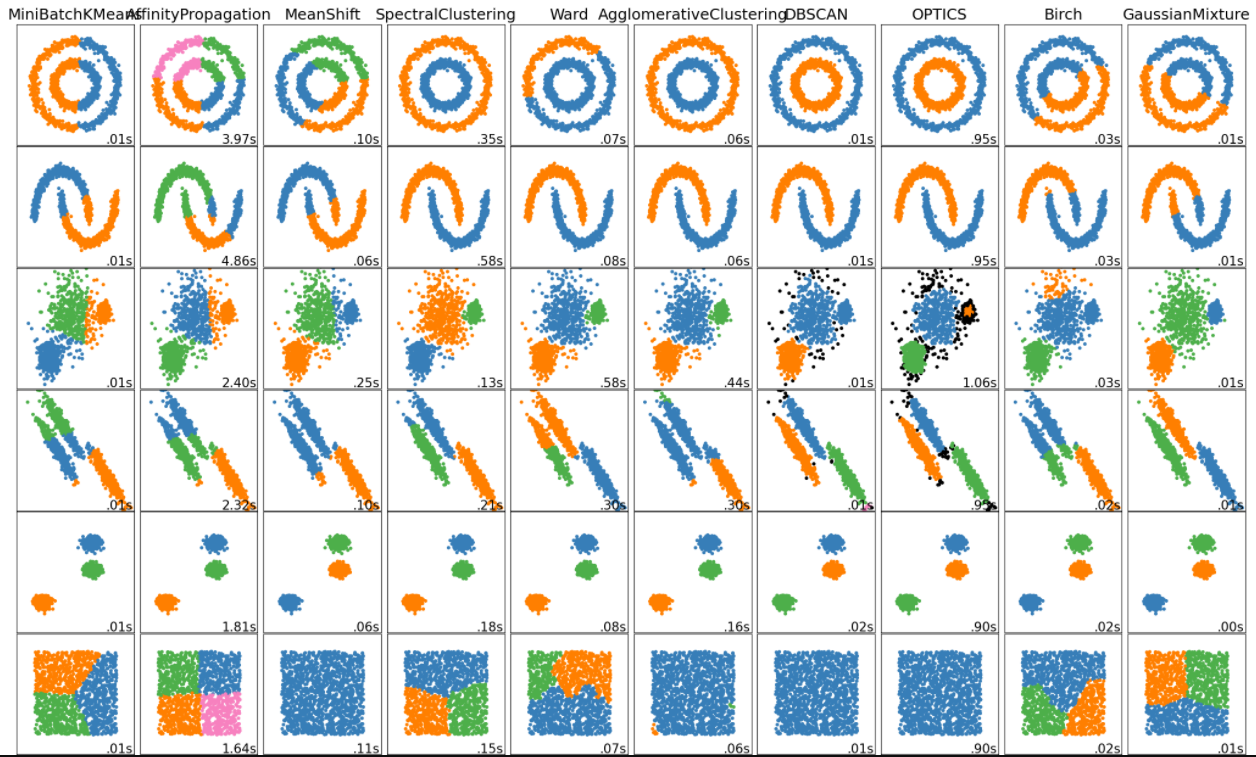
* **Python da clustering için tek yöntem K-Means değildir, bundan farklı algoritmlar da var. Bu algoritmaların karşılaştırması yukarıdaki resimde mevcuttur.**
* **verimize bakarak burdaki algoritmalar hangisi daha uyumlu bulup, buna göre algoritma seçimi yapabiliriz.**
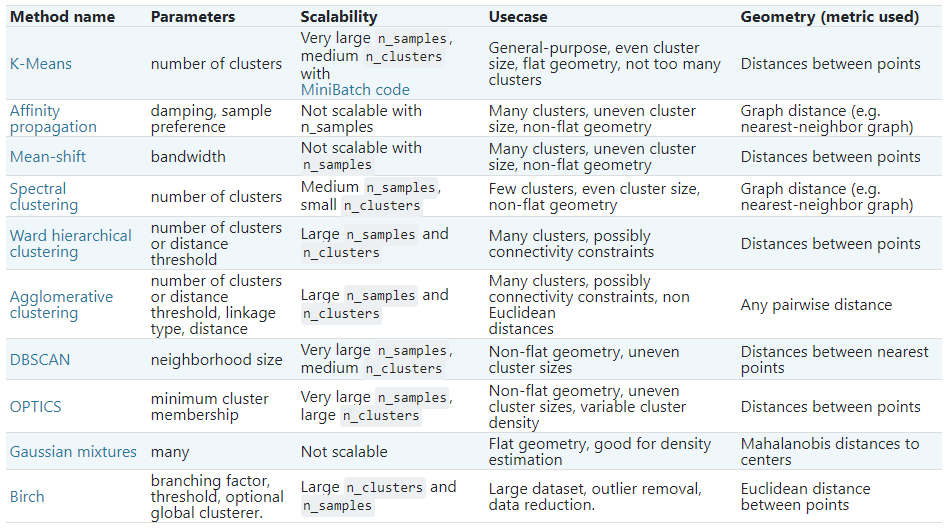

In [20]:
#Kütüphaneleri aktif ediyoruz
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# verimizi çekelim

veriler = pd.read_csv("veriler/musteriler.csv")
veriler

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


* **verilerdeki hacim şöyle tanımlanıyor; bizimle yapılan iş hacmi parasal olarak düşünebiliriz.**

In [21]:
# verileri oluşturalım

X = veriler.iloc[:,2:].values

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 4, init= "k-means++") #"n_clusters" ile kaç cluster istiyorsak onu belirliyoruz,"init" ile hangi yöntemi kullanmak istiyorsak onu belirliyoruz.
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
# k_means ile ilgili bilgilerde alabiliriz, mesela merkezlerini nerede olşturdu bunun ile alakalı bilgi alalım

kmeans.cluster_centers_

# random olarak merkezleri seçtiğimiz için her çalıştırdığımızda merkezleri farklı alacaktır.

array([[4.15735294e+01, 4.48485294e+04, 5.20147059e+03],
       [5.93000000e+01, 1.22140000e+05, 8.00000000e+03],
       [4.15500000e+01, 1.64833333e+04, 5.42291667e+03],
       [5.24038462e+01, 8.15884615e+04, 6.76538462e+03]])

* **biz verileri hacim ve maaş olarak çektiğimiz için iki tane sütun, 3 adet cluster seçtiğimiz için 3 satır çıkıyor. Yani sol sütun Hacim için belirlenen merkez noktaları, sağ sütun ise Maaş için belirlenen merkez noktaları.**

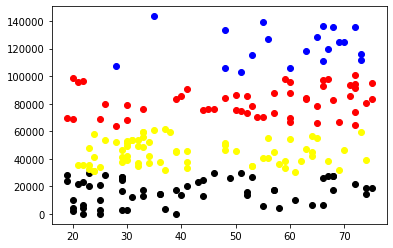

In [24]:
Y_tahmin = kmeans.fit_predict(X)

plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1], c="red")
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1], c="blue")
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1], c="black")
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1], c="yellow")

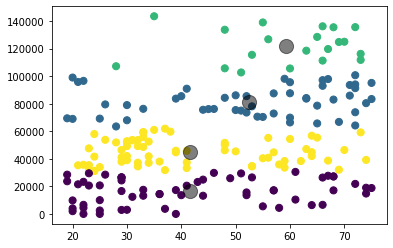

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

[242389963637.07, 69083341697.90192, 37362918355.90633, 19665092404.200554, 12911405620.284052, 8631986006.71636, 6759980025.247439, 5301569084.086021, 4172872426.692027, 3330306834.669608]


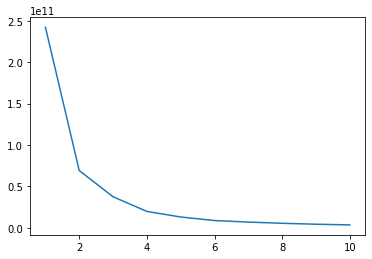

In [13]:
# WCSS kullanarak k için optimum noktayı bulmaya çalışalım:

sonuclar = []
for i in range(1,11): # buradaki amacımız 1 ile 10 arasındaki farklı clustering değerlerini incelemek.
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=123) # her for döndüğünde KMeansı tekrar tekrar tanımla, aynı random state ile başlaması için buraya bir değer veriyoruz
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_) # "inertia_" bizim aslında WCSS değerlerimiz ve bunları toplayacağız
print(sonuclar)

plt.plot(range(1,11), sonuclar)

* **burada 4'ü alabiliriz, 4 güzel bir segmantasyon noktası gibi duruyor. Küçük bir cluster almak istiyorsak 2'yi alabiliriz.**